In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from plotly.offline import iplot
from math import sqrt

In [2]:
df_apple = pd.read_csv("C:/Users/cwai9/Desktop/Mid Project/Cap Stone/CapStoneProject/Data Set/apple stock price.csv")
df_sneaker = pd.read_csv("C:/Users/cwai9/Desktop/Mid Project/Cap Stone/CapStoneProject/Data Set/Sneaker.csv")
df_gold = pd.read_csv("C:/Users/cwai9/Desktop/Mid Project/Cap Stone/CapStoneProject/Data Set/Gold Futures.csv")

In [3]:
df_sneaker

Order Date   Brand                                   Sneaker Name  \
0         9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1         9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2         9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3         9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4         9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

      Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0         $1,097         $220      9/24/16       11.0    California  
1           $685         $220     11/23/16       11.0    California  
2           $690         $220     11/23/16       11.0    California  
3         $1,075         $220     11/23/16       11.5      Kentucky  
4           $828         $220      2/11/17       11.0  Rhode Island  
...          ...          ...          ...        ...           ...  
99951       $565         $220     12/26/18        8.0        Oregon  
99952       $598         $220     12/26/18        8.5    California  
99953       $605         $220     12/26/18        5.5      New York  
99954       $650         $220     12/26/18       11.0    California  
99955       $640         $220     12/26/18       11.5         Texas  

[99956 rows x 8 columns]

In [4]:
#Convert order date into date mode
def date_converter(string):

    month = string.split('/')[0].zfill(2)
    day = string.split('/')[1].zfill(2)
    year =  str( 2000 + int( string.split('/')[2] ) )
    newdate = year + '-' + month +'-' + day
    return newdate

df_sneaker['Order Date'] = df_sneaker.apply(lambda x: date_converter(x['Order Date']), axis=1)

In [5]:
#Convert release date into date mode
def date_converter(string):

    month = string.split('/')[0].zfill(2)
    day = string.split('/')[1].zfill(2)
    year =  str( 2000 + int( string.split('/')[2] ) )
    newdate = year + '-' + month +'-' + day
    return newdate

df_sneaker['Release Date'] = df_sneaker.apply(lambda x: date_converter(x['Release Date']), axis=1)

In [6]:
#Calculate the actual days since sneaker release
df_sneaker[['Release Date','Order Date']] = df_sneaker[['Release Date','Order Date']].apply(pd.to_datetime) 
df_sneaker['Days'] = (df_sneaker['Order Date'] - df_sneaker['Release Date']).dt.days

In [7]:
df_sneaker.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
Days            0
dtype: int64

In [8]:
df_sneaker.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price              object
Retail Price            object
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
Days                     int64
dtype: object

In [9]:
df_sneaker.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price              object
Retail Price            object
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
Days                     int64
dtype: object

In [10]:
#Convert sales price into int

df_sneaker['Sale Price'] = df_sneaker['Sale Price'].str.replace('$','').str.replace(',','')
df_sneaker['Sale Price'] = pd.to_numeric(df_sneaker['Sale Price'])
df_sneaker['Sale Price']

C:\Users\cwai9\AppData\Local\Temp/ipykernel_27028/3565208451.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



0        1097
1         685
2         690
3        1075
4         828
         ... 
99951     565
99952     598
99953     605
99954     650
99955     640
Name: Sale Price, Length: 99956, dtype: int64

In [11]:
#Convert retail price into int

df_sneaker['Retail Price'] = df_sneaker['Retail Price'].str.replace('$','').str.replace(',','')
df_sneaker['Retail Price'] = pd.to_numeric(df_sneaker['Retail Price'])
df_sneaker['Retail Price']

C:\Users\cwai9\AppData\Local\Temp/ipykernel_27028/1069974517.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



0        220
1        220
2        220
3        220
4        220
        ... 
99951    220
99952    220
99953    220
99954    220
99955    220
Name: Retail Price, Length: 99956, dtype: int64

In [12]:
df_sneaker.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
Days                     int64
dtype: object

In [13]:
#Calculate the profit percentage

df_sneaker['ProfitPercentage'] = (((df_sneaker['Sale Price'] - df_sneaker['Retail Price']) /df_sneaker['Retail Price']) *100) 

In [14]:
df_sneaker.dtypes

Order Date          datetime64[ns]
Brand                       object
Sneaker Name                object
Sale Price                   int64
Retail Price                 int64
Release Date        datetime64[ns]
Shoe Size                  float64
Buyer Region                object
Days                         int64
ProfitPercentage           float64
dtype: object

In [15]:
df_sneaker.describe()

Sale Price  Retail Price     Shoe Size          Days  \
count  99956.000000   99956.00000  99956.000000  99956.000000   
mean     446.634719     208.61359      9.344181    183.708722   
std      255.982969      25.20001      2.329588    232.354142   
min      186.000000     130.00000      3.500000    -69.000000   
25%      275.000000     220.00000      8.000000     10.000000   
50%      370.000000     220.00000      9.500000     56.000000   
75%      540.000000     220.00000     11.000000    345.000000   
max     4050.000000     250.00000     17.000000   1321.000000   

       ProfitPercentage  
count      99956.000000  
mean         124.824477  
std          150.856291  
min          -15.454545  
25%           26.363636  
50%           70.454545  
75%          161.363636  
max         2031.578947

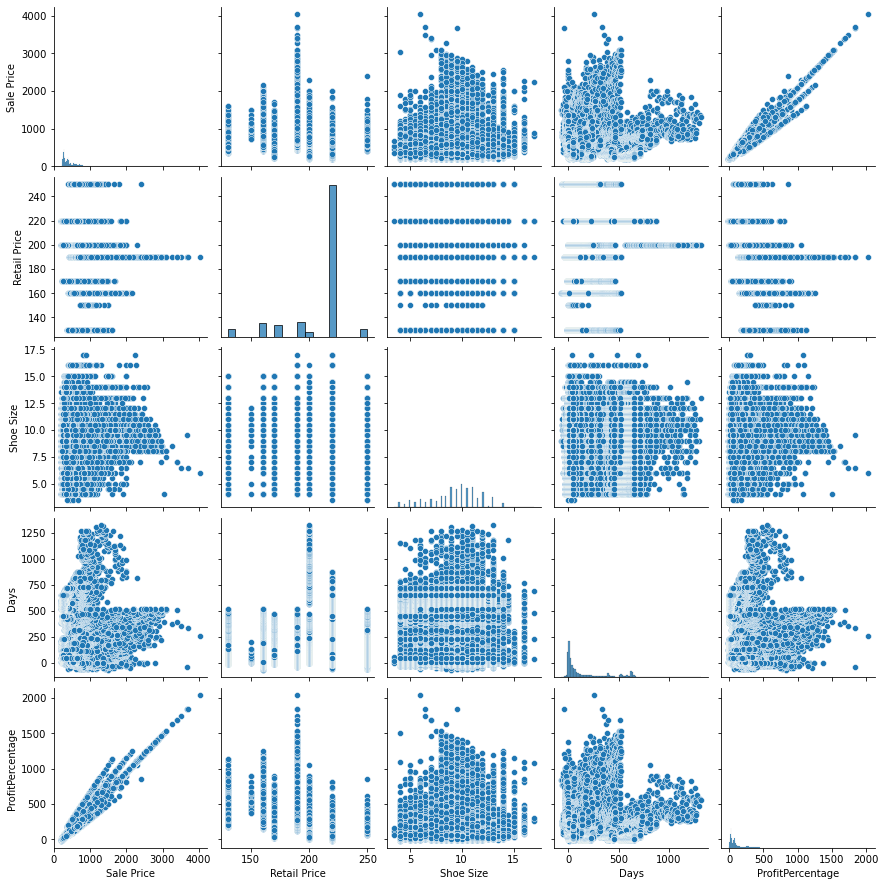

In [16]:
sns.pairplot(df_sneaker)

<AxesSubplot:>

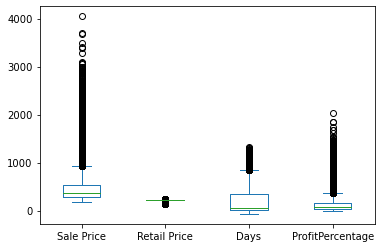

In [17]:
df_sneaker[['Sale Price','Retail Price','Days','ProfitPercentage']].plot(kind='box')

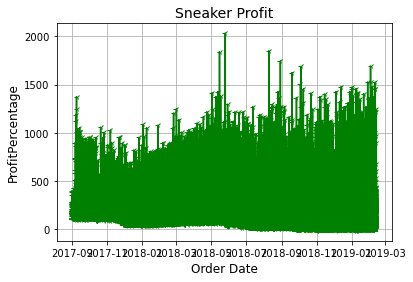

<Figure size 14400x14400 with 0 Axes>

In [18]:
#chart for sneaker profit vs order date

plt.plot(df_sneaker['Order Date'], df_sneaker['ProfitPercentage'], color='green', marker='3')
plt.title('Sneaker Profit', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('ProfitPercentage', fontsize=12)
plt.grid(True)
plt.figure(figsize=(200, 200))
plt.show()

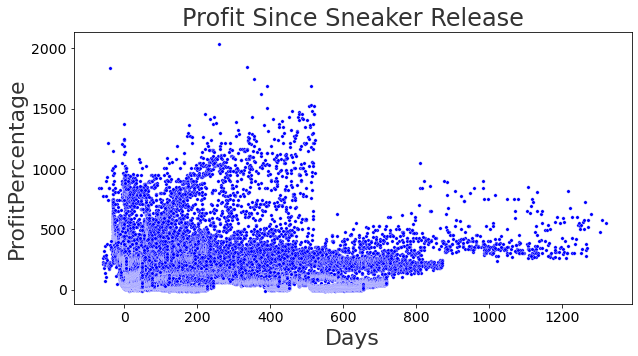

In [21]:
#chart for sneaker profit vs days of release

plt.figure(figsize = (10,5))

sns.scatterplot(data=df_sneaker, x='Days', y='ProfitPercentage', color ='blue', s=12)
plt.xlabel('Days',fontsize = 22, alpha =0.8)
plt.ylabel('ProfitPercentage',fontsize = 22, alpha =0.8)
plt.title('Profit Since Sneaker Release',fontsize = 24, alpha =0.8)
plt.tick_params(labelsize=14)
plt.show()



In [22]:
X=df_sneaker[['Sale Price','Retail Price','Days','Shoe Size']]
y=df_sneaker['ProfitPercentage']

In [23]:
lr = LinearRegression()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [25]:
scaler = StandardScaler().fit(X_train)

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
lr.intercept_

248.26123422748242

In [28]:
lr.coef_

array([ 0.50654979, -1.67162164,  0.00518283, -0.21375472])

In [29]:
lr.score(X_train,Y_train)

0.9893126590034484

In [30]:
scores = cross_val_score(lr,X_train,Y_train,cv = 5)

In [31]:
scores.mean()

0.9893031187299381

In [32]:
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train,Y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train,Y_train))
print(ridge_model.score(X_test,Y_test))

0.9893126590034311
0.9891920600999237


In [33]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alpha = np.logspace(0,5,100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alpha, scoring= 'r2', cv = 5)

# Fit model using best ridge alpha!
ridge_cv = ridge_cv.fit(X_train,Y_train)

In [34]:
ridge_cv

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [35]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,1,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV (alphas=l_alphas, cv = 5, max_iter=500)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train,Y_train)

LassoCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
        cv=5, max_iter=500)

In [36]:
lasso_cv.alpha_

0.004862601580065354

In [37]:
print(" Ridge ".center(18, "="))
print(ridge_cv.score(X_train, Y_train))
print(ridge_cv.score(X_test, Y_test))
print(" Lasso ".center(18, "="))
print(lasso_cv.score(X_train, Y_train))
print(lasso_cv.score(X_test, Y_test))
print(" lr ".center(18, "="))
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

===== Ridge ======
0.989312648897255
0.9891918808135005
===== Lasso ======
0.9893126588060236
0.9891920639865599
======= lr =======
0.9893126590034484
0.9891920603175018


In [38]:
#Prediction for profit vs days since release

y_pred = lr.predict(X_test)

layout = go.Layout(
    xaxis = dict(
        title = 'Date',
    ),
    yaxis = dict(
        title = 'ProfitPercentage'
    )
)

trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = y_pred,
    mode = 'lines',
    name = 'Predicted'
)

Sneaker_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot = go.Figure(data=Sneaker_data, layout=layout)

In [39]:
iplot(plot)

In [ ]:
Actual_vs_Prediction = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': y_pred})

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(Y_test, y_pred, s=4, color ='blue')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actual Value', fontsize=22, alpha=0.8)
ax.set_ylabel('Predicted Value', fontsize=22, alpha=0.8)
ax.set_title("Actual VS Prediction", fontsize=24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

In [ ]:
MSE = mean_squared_error(Y_test,y_pred)

RMSE = sqrt(MSE)

print(" MSE ".center(18, "="))
print(MSE)
print(" RMSE ".center(18, "="))
print(RMSE)